In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt

In [2]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Matplotlib

For this excercise, we have written the following code to load the stock dataset built into plotly express.

In [16]:
stocks = px.data.stocks()
stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Question 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

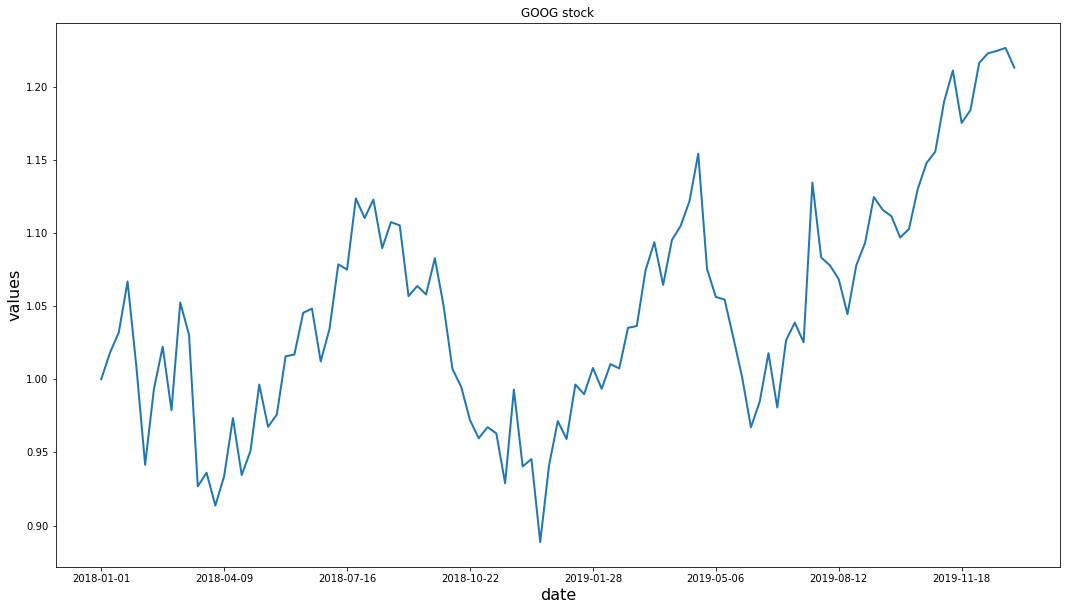

In [22]:
from matplotlib.pyplot import MultipleLocator

x = stocks['date']
y = stocks['GOOG']

fig, ax= plt.subplots(figsize=(18,10))
ax.plot(x,y,linewidth=2.0)
plt.title('GOOG stock')
plt.xlabel('date',fontsize = 16)
plt.ylabel('values',fontsize = 16)
x_major_locator=MultipleLocator(14)
ax.xaxis.set_major_locator(x_major_locator)
#plt.rcParams['figure.figsize']=(18,10)
plt.show()

## Question 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

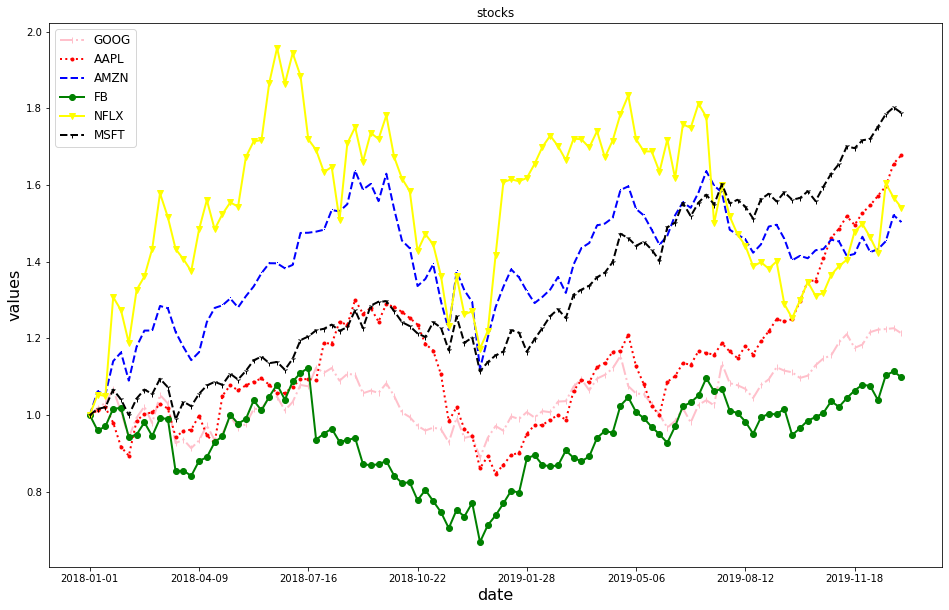

In [26]:

from matplotlib import pyplot as plt

y1=stocks['AAPL']
y2=stocks['AMZN']
y3=stocks['FB']
y4=stocks['NFLX']
y5=stocks['MSFT']

plt.figure(figsize=(16,10))
plt.plot(x,y,label='GOOG',linewidth=2,linestyle='dashdot',marker='|',color='pink')
plt.plot(x,y1,label='AAPL',linewidth=2,linestyle='dotted',marker='.',color='red')
plt.plot(x,y2,label='AMZN',linewidth=2,linestyle='dashed',marker=',',color='blue')
plt.plot(x,y3,label='FB',linewidth=2,linestyle='solid',marker='o',color='green')
plt.plot(x,y4,label='NFLX',linewidth=2,linestyle='-',marker='v',color='yellow')
plt.plot(x,y5,label='MSFT',linewidth=2,linestyle='--',marker='1',color='black')
plt.title('stocks')
plt.xlabel('date', fontsize = 16)
plt.ylabel('values', fontsize = 16)
#plt.legend(prop = {'size':12})
plt.legend(fontsize=12)
x_major_locator=MultipleLocator(14)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()
#plt.savefig(r'C:\Users\sc35131\Desktop\wangyao\Cell_consistence_alogrithm\shang\1234567890',bbox_inches = 'tight',pad_inches = 0,dpi =350)


# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 3:

Let's explore this dataset. Pose a question and create a plot that support drawing answers for your question.

Some possible questions:
- Are there differences between male and female when it comes to giving tips?
- What attribute correlate the most with tip?

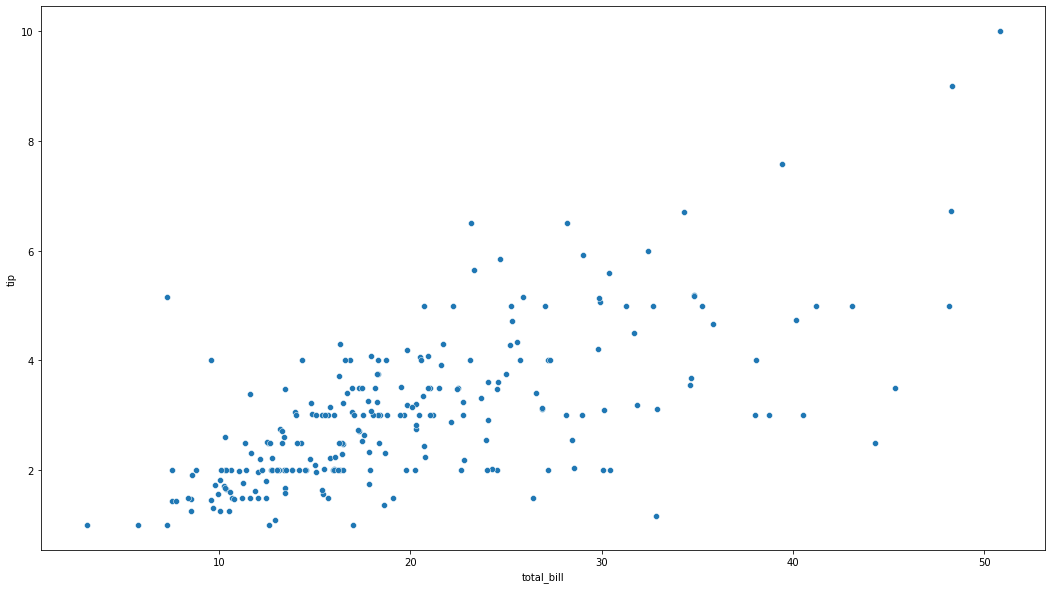

In [30]:
# Question: What is the relationship between total_bill and tip?
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

# Plotly Express

## Question 4:

Redo the above exercises (challenges 2 & 3) with plotly express. Create diagrams which you can interact with.

### The stocks dataset

*Hints*:
- Turn stocks dataframe into a structure that can be picked up easily with plotly express

In [34]:
df = px.data.stocks() 
fig= px.line(df, x="date", y=["GOOG","AAPL","AMZN","FB","NFLX","MSFT"])
fig.update_yaxes(title_text="values")
fig.show()

### The tips dataset

In [21]:
df = px.data.tips() 
fig = px.scatter(df, x="total_bill", y="tip")
fig.show()

## Question 5:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

In [36]:
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [41]:
df_2007 = df.query('year==2007')
df_continent=df_2007.groupby('continent').sum()
print(df_continent)
fig = px.bar(df_continent,x='pop', y=df_continent.index, orientation='h',text='pop',color=df_continent.index)
#fig = px.bar(df_2007, x="pop", y="continent", orientation='h',text='pop',color='continent')
fig.update_yaxes(categoryorder="total ascending")
fig.show()

             year   lifeExp         pop      gdpPercap  iso_num
continent                                                      
Africa     104364  2849.914   929539692  160629.695446    23859
Americas    50175  1840.203   898871184  275075.790634     9843
Asia        66231  2334.040  3811953827  411609.886714    13354
Europe      60210  2329.458   586098529  751634.449078    12829
Oceania      4014   161.439    24549947   59620.376550      590


In [ ]:
%matplot inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
import pandas as pd
import numpy as np
import ploty.io as pio
pio.renderers.default='mimetype+notebook'

x=pd.read_csv('data',encoding='ISO-8859-1')
x.head()
x.tail()
x.describe()
x[x[]==]
x.query('year==2007')
by_education=x.groupby('Education')

with open(filepath, 'a') as w:
    line=pd.readline().strip()
    while line:
        line=pd.readline().strip()
        
fig, ax=plt.subplots(figsize=(16,10))
ax.plot(x.Education,y['tips'],linestyle='dashed',marker='o',color='red',linewidth=2,ax[0])
plt.title('Relationship between education and tips',fontsize=13)
plt.set_xlabel('Education',fontsize=10)
plt.set_ylabel('tips',fontsize=10)
plt.set_ylim(0,10)
plt.set_x_locator(plt.MultipleLocator(14))
plt.show()

plt.figure(figsize=(16,10))
plt.plot(x,y,linestyle='dotted',label='')
plt.title()
plt.xlabel()
plt.ylabel()
ax=plt.gca()
ax.axis.set_major_locator(MultipleLocator(14))
plt.rcParams['figure.figsize']=(16,10)
plt.show()

fig=sns.scatterplot(data=,x=,y=)
tips.px.bar(df,x=,y=,orientation='h',color='continent',text='pop')
fig.update_yaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='')
fig.show()

(\d*)[,.](\d*)
print(string.lower())
print(string.replace('  ',' ').capitalize().upper().split(''))

tips=pd.json.load()
tips=pd..load()